## Natural Language Processing Applications 

#### Importing numpy, pandas and matplotlib.pyplot. Loading the dataset into a data frame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_comment_small_100=pd.read_csv('train_comment_small_100.csv')

In [3]:
train_comment_small_100.head()

,comment_text,toxic
0,"""\n \n I'm sure if you worked on articles othe...",0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\n More\n I can't make any real suggestions o...",0
4,REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski,0


In [4]:
train_comment_small_100.shape

(99, 2)

#### Cleaning and preparing the data. Creating an array for your cleaned text to be stored in.

In [5]:
import re
import nltk
from nltk import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [6]:
cleaned_text=[]

#### Data Cleaning: 
1. Replacing all non-alphabets with a whitespace.
2. Converting all alphabets into lowercase.
3. Spliting each review into individual words.
3. Initiating the PorterStemmer. If the word is not a stopword, perform stemming on the word. Joining all the individual words back together to form a cleaned review. Append this cleaned review to the array you created.

In [7]:
for i in range(0,train_comment_small_100.shape[0]):
    review=re.sub('[^a-zA-Z]',' ',train_comment_small_100['comment_text'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=''.join(review)
    cleaned_text.append(review)

In [8]:
cleaned_text[:3]

['sureworkarticlarcaynfinetwoseemproblemseekeditxenotalk',
 'awwmatchbackgroundcolourseeminglistuckthanktalkjanuariutc',
 'heymanreallitrieditwarguyconstantliremovrelevinformtalkeditinsteadtalkpageseemcareformatactualinfo']

In [9]:
len(cleaned_text)

99

#### Converting the reviews into word count vectors using CountVectorizer. Creating an array to store each unique word as its own column, hence making them independent variables

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer(max_features = 20)

In [12]:
X = cv.fit_transform(cleaned_text).toarray()

In [13]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Importing LabelEncoder from sklearn.preprocessing. Using the LabelEncoder on the target output (y).

In [14]:
from sklearn import preprocessing

In [15]:
y=train_comment_small_100['toxic']

In [16]:
labelencoder_y = preprocessing.LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Importing train_test_split. Dividing the dataset into a training set and a validation set (80/20).

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

#### Importing StandardScaler from sklearn.preprocessing. Using the StandardScaler on the features of both the training set and the validation set (X)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Creating the neural network and import Sequential from keras.models and Dense from Keras layers.

In [23]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


#### Initializing the neural network. Adding the hidden layers with 'relu' as the activation function and the output layer with 'softmax' as the activation function. Compiling the neural network, using 'adam' as the optimizer, 'binary_crossentropy' as the loss function and 'accuracy' as the performance metric.

In [24]:
classifier = Sequential()

In [25]:
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 20))
classifier.add(Dense(output_dim =20, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

D:\Python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=20, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
D:\Python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  
D:\Python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=1, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
classifier.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x000001AC73C878D0>>

#### Training the model. Fit the neural network on the training dataset with a batch_size of 3 and a nb_epoch of 200.

In [27]:
classifier.fit(X_train, y_train, batch_size = 3, nb_epoch = 200)

D:\Python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/200
79/79 [==============================] - 1s 16ms/step - loss: 13.9746 - accuracy: 0.0886
Epoch 2/200
79/79 [==============================] - 0s 480us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 3/200
79/79 [==============================] - 0s 454us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 4/200
79/79 [==============================] - 0s 442us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 5/200
79/79 [==============================] - 0s 480us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 6/200
79/79 [==============================] - 0s 318us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 7/200
79/79 [==============================] - 0s 2ms/step - loss: 13.9746 - accuracy: 0.0886
Epoch 8/200
79/79 [==============================] - 0s 2ms/step - loss: 13.9746 - accuracy: 0.0886
Epoch 9/200
79/79 [==============================] - 0s 1ms/step - loss: 13.9746 - accuracy: 0

79/79 [==============================] - 0s 783us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 156/200
79/79 [==============================] - 0s 770us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 157/200
79/79 [==============================] - 0s 619us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 158/200
79/79 [==============================] - 0s 619us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 159/200
79/79 [==============================] - 0s 669us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 160/200
79/79 [==============================] - 0s 706us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 161/200
79/79 [==============================] - 0s 766us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 162/200
79/79 [==============================] - 0s 757us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 163/200
79/79 [==============================] - 0s 997us/step - loss: 13.9746 - accuracy: 0.0886
Epoch 164/200
79/79 [==============================] - 0s 808us/step - loss: 1

In [28]:
X_test[:,5]

array([-0.1132277, -0.1132277, -0.1132277, -0.1132277, -0.1132277,
       -0.1132277, -0.1132277, -0.1132277, -0.1132277, -0.1132277,
       -0.1132277, -0.1132277, -0.1132277, -0.1132277, -0.1132277,
       -0.1132277, -0.1132277, -0.1132277, -0.1132277, -0.1132277])

#### Validating the model. Evaluating the neural network and print the accuracy scores to see how it performed. What is the conclusion?

In [29]:
y_pred = classifier.predict(X_test)

scores = classifier.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = classifier.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

79/79 [==============================] - 0s 3ms/step
Training Accuracy: 8.86%

20/20 [==============================] - 0s 50us/step
Testing Accuracy: 15.00%



In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.15      1.00      0.26         3

    accuracy                           0.15        20
   macro avg       0.07      0.50      0.13        20
weighted avg       0.02      0.15      0.04        20



D:\Python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The model is not efficient as the accuracy is not good. One of the reasons could be lack of good data for training the network.

#### Printing the confusion matrix by importing confusion_matrix from sklearn.metrics. What does the confusion matrix tell?

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [32]:
cm=confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Prediction')

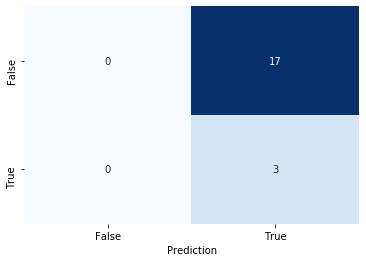

In [33]:
ax = sns.heatmap(cm, annot=True, 
                 xticklabels=['False','True'],
                 yticklabels=['False','True'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel('Prediction')

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.The confusion matrix shows the ways in which our classification model is confused when it makes predictions.
<br><br>
From the above confusion matrix we can see that our model's efficiency is very low. The False Negative rate is high which says, the model predicted the false values as true.